In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBRegressor
sklearn.set_config(transform_output="pandas")
import joblib

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

*** ЗАГРУЖАЮ ДАНННЫЕ

In [152]:
train_file_path = "./data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print (f"Полный дата сет в виде {dataset_df.shape}")


Полный дата сет в виде (1460, 81)


In [153]:
test_df = pd.read_csv('./data/test.csv')
# Объединяем, чтобы препроцессор видел все категории сразу
all_data = pd.concat([dataset_df.drop('SalePrice', axis=1), test_df], axis=0)

In [154]:
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [155]:
dataset_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
320,321,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,342643
965,966,60,RL,65.0,10237,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,178900
750,751,50,RM,55.0,8800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,96500


In [156]:
dataset_df = dataset_df.drop("Id", axis=1)

In [157]:
dataset_df.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [158]:
dataset_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [159]:
dataset_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   str    
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   str    
 5   Alley          91 non-null     str    
 6   LotShape       1460 non-null   str    
 7   LandContour    1460 non-null   str    
 8   Utilities      1460 non-null   str    
 9   LotConfig      1460 non-null   str    
 10  LandSlope      1460 non-null   str    
 11  Neighborhood   1460 non-null   str    
 12  Condition1     1460 non-null   str    
 13  Condition2     1460 non-null   str    
 14  BldgType       1460 non-null   str    
 15  HouseStyle     1460 non-null   str    
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt      1460

In [160]:
dataset_df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [161]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [162]:
plt.figure(figsize=(9,8))


<Figure size 900x800 with 0 Axes>

<Figure size 900x800 with 0 Axes>

/tmp/ipykernel_113013/3479937374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df["SalePrice"], color="b", bins=1000, hist_kws={"alpha":0.5})


<Axes: xlabel='SalePrice', ylabel='Density'>

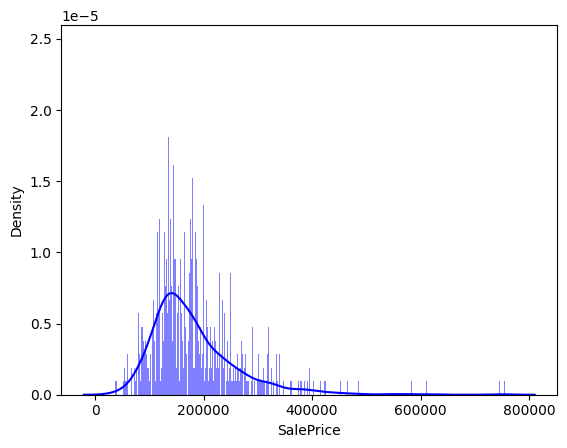

In [163]:
sns.distplot(dataset_df["SalePrice"], color="b", bins=1000, hist_kws={"alpha":0.5})

In [164]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'),
 <StringDtype(storage='python', na_value=nan)>,
 dtype('int64')]

In [165]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'),
 <StringDtype(storage='python', na_value=nan)>,
 dtype('int64')]

In [166]:
df_num = dataset_df.select_dtypes(include = ["float64", "int64"])

In [167]:
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


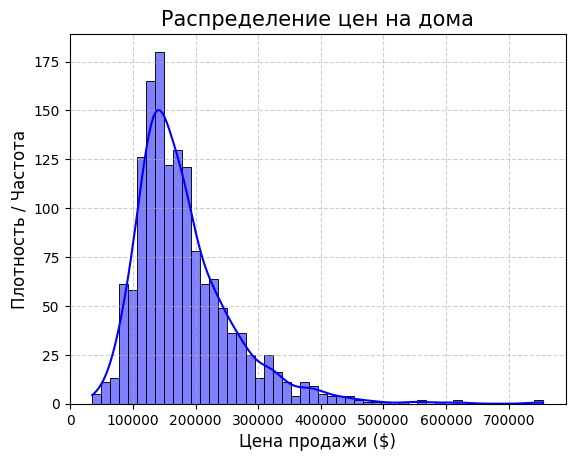

In [168]:

# Добавляем подписи
sns.histplot(df_num["SalePrice"], kde=True, color="b", bins=50)
plt.title("Распределение цен на дома", fontsize=15)
plt.xlabel("Цена продажи ($)", fontsize=12)
plt.ylabel("Плотность / Частота", fontsize=12)

# Включаем сетку, чтобы лучше видеть масштаб
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

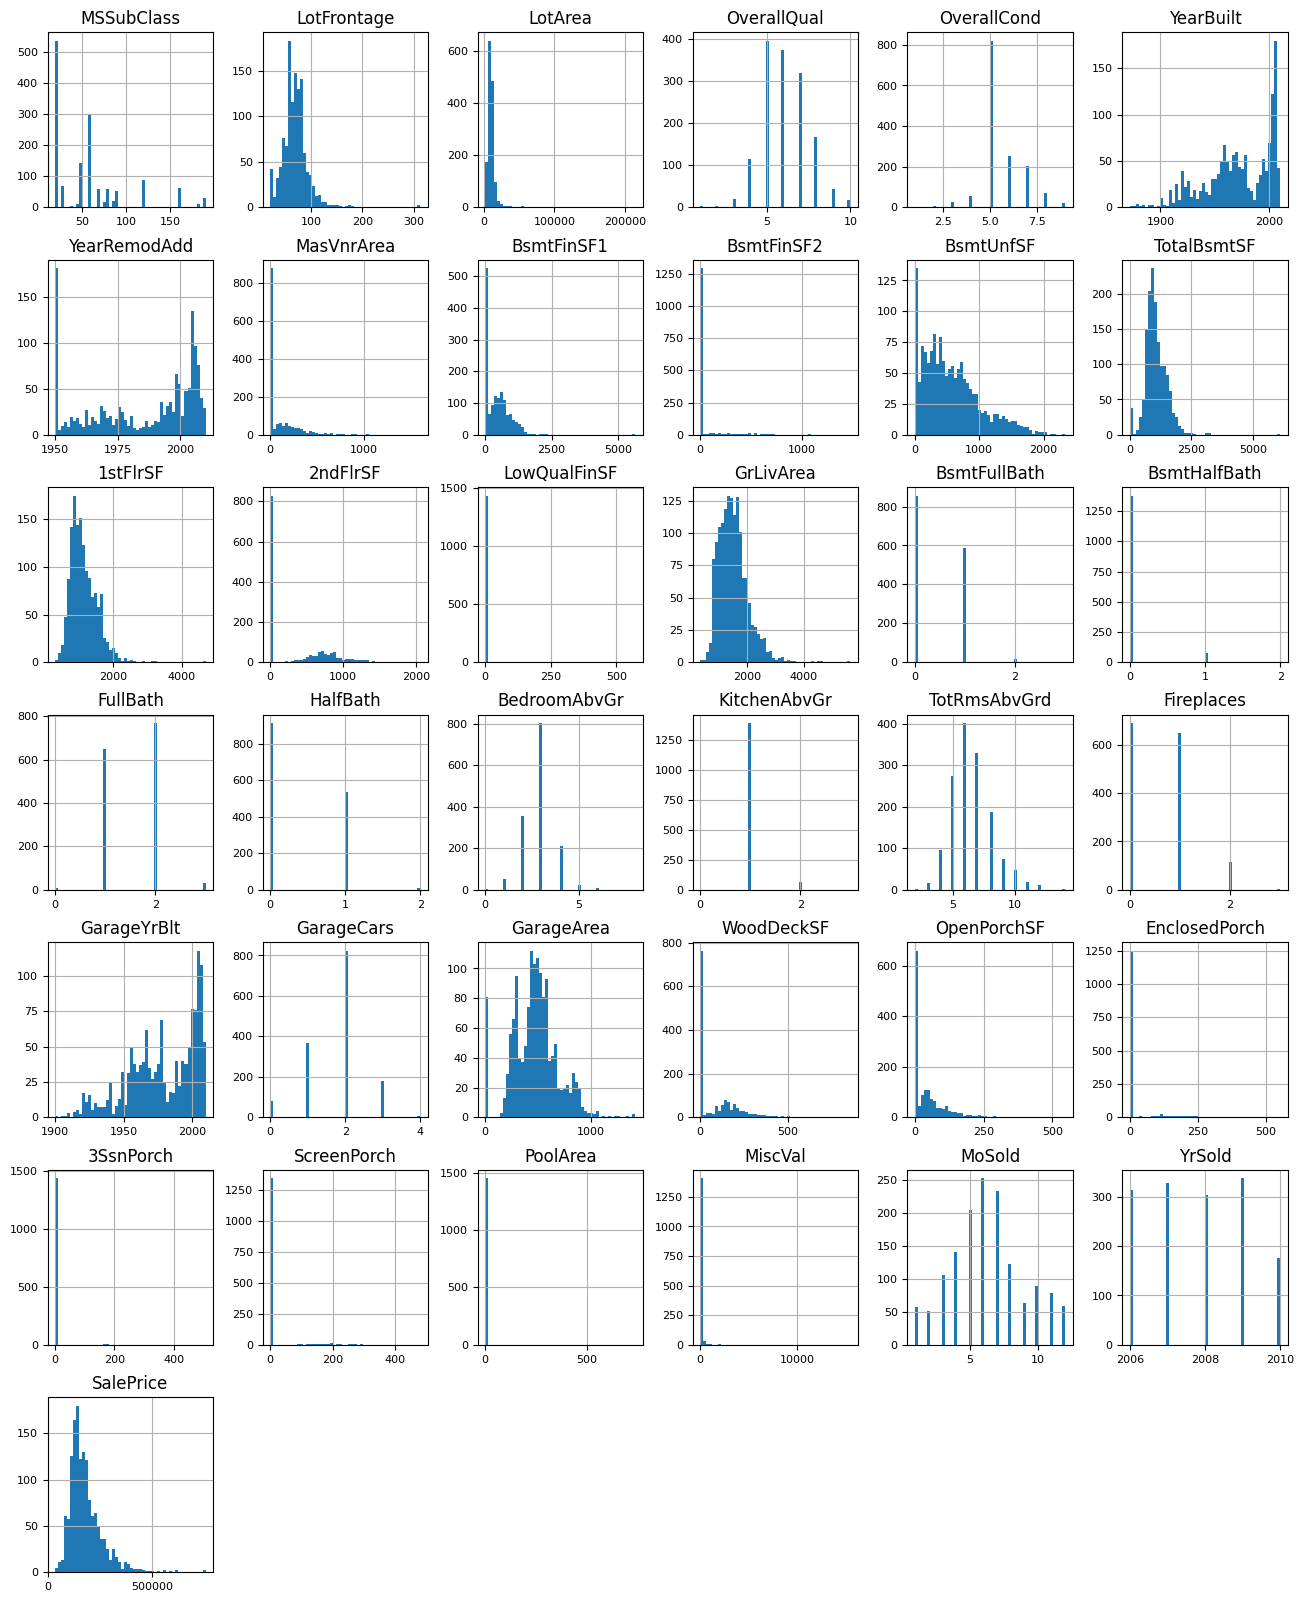

In [169]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8)

Первичный анализ соотношения параметров к количеству. Графики неудобно читаемы, решил объединить в диапазоны ниже.

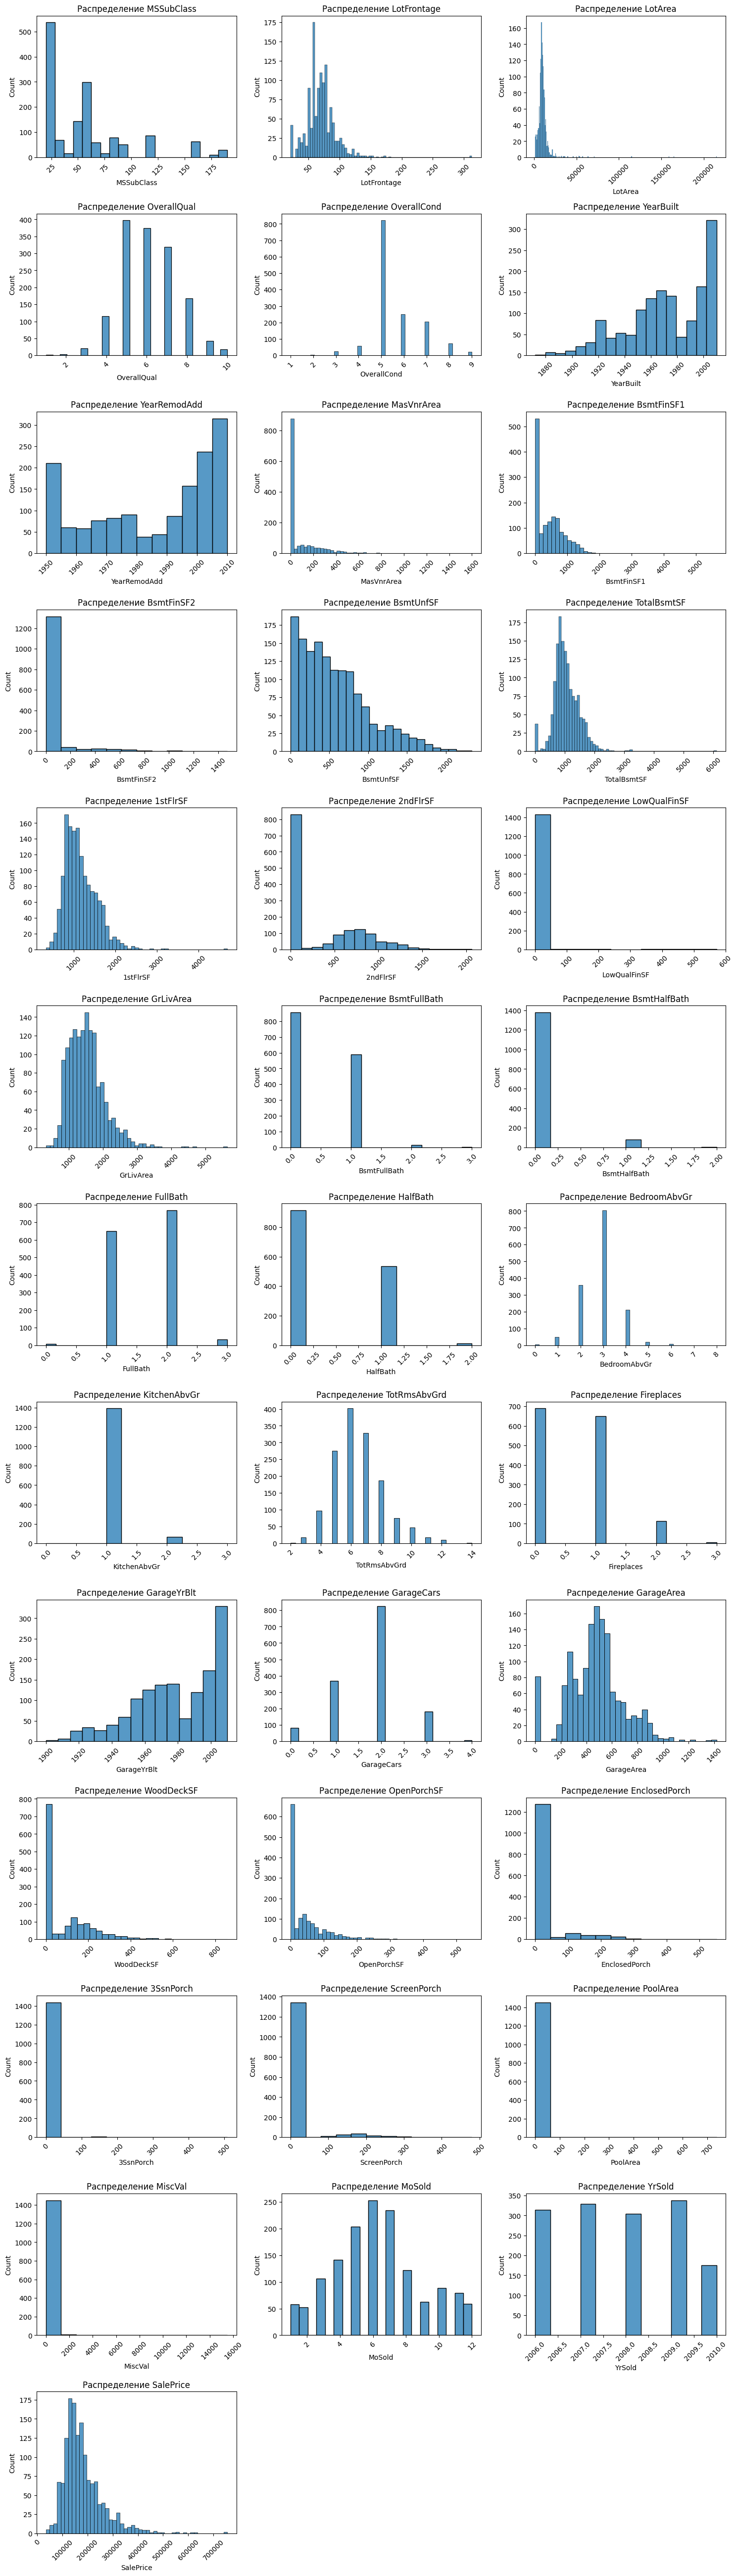

In [170]:
df_num = dataset_df.select_dtypes(include = ["float64", "int64"])
n_cols = 3
n_rows = (len(df_num) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_num):
    sns.histplot(x=dataset_df[col], ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Убираем пустые графики, если колонок меньше чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




**MSSubClass: Идентифицирует тип жилья, участвующего в продаже.**

20	
1-этажные дома 1946 года и новее 

30	
1-этажные дома 1945 года и старше 

40	
1-этажные дома с жилой мансардой (все возрасты) 

45	
1.5-этажные дома — недостроенные (все возрасты) 

50	
1.5-этажные дома — достроенные (все возрасты) 

60	
2-этажные дома 1946 года и новее 

70	
2-этажные дома 1945 года и старше 

75	
2.5-этажные дома (все возрасты) 

80	
Расщепленный (split) или многоуровневый уровень 

85	
Расщепленный фойе (split foyer) 

90	
Дуплекс (все стили и возрасты) 

120	
1-этажный PUD (плановая застройка) 1946+ 

150	
1.5-этажный PUD (все возрасты) 

160	
2-этажный PUD 1946+ 

180	
PUD многоуровневый (включая split level/foyer) 

190	
Конверсия на 2 семьи (все стили и возрасты)

Всплески построек 1945 года и 1950 и 1960 годов. Не сильно информативно, но скорее всего будет зависимость к постройкам

**LotFrontage: Линейные футы фасада, примыкающего к улице.** Длинный хвост значение за 150 футов. Нужно логарифмировать признак 

**LotArea: Размер участка в квадратных футах.** Нужно логарифмировать признак 

**OverallQual: Оценивает общие материалы и отделку дома.** Существенное влияние на оценку стоимости. Рассмотреть как колинеарный параметр

**OverallCond: Оценивает общее состояние дома.**

**OverallQual/ OverallCond нужно будет расмотреть как feature**

10	
Очень превосходно (Very Excellent) 

9	
Превосходно (Excellent) 

8	
Очень хорошо (Very Good) 

7	
Хорошо (Good) 

6	
Выше среднего (Above Average) 

5	
Средне (Average) 

4	
Ниже среднего (Below Average) 

3	
Посредственно (Fair) 

2	
Плохо (Poor) 

1	
Очень плохо (Very Poor)

**YearBuilt: Дата первоначальной постройки.** Значение интересно для оценки

**YearRemodAdd: Дата реконструкции (совпадает с датой постройки, если реконструкции не было).** Сильная зависимость на цену

**MasVnrArea: Площадь облицовки в квадратных футах.** Необходимо лоагрфимировать. Слишком длинный хвост на графике

**BsmtFinSF1: Площадь отделки 1-го типа в квадратных футах.**Необходимо лоагрфимировать. Слишком длинный хвост на графике

**BsmtFinSF2: Площадь отделки 2-го типа в квадратных футах.**Необходимо лоагрфимировать. Слишком длинный хвост на графике.

**BsmtUnfSF: Площадь неосвоенного (чернового) подвала в кв. футах.**

**TotalBsmtSF: Общая площадь подвала в квадратных футах.** Необходимо лоагрфимировать. Слишком длинный хвост на графике

**1stFlrSF: Площадь первого этажа в квадратных футах.** Необходимо лоагрфимировать. Слишком длинный хвост на графике

**2ndFlrSF: Площадь второго этажа в квадратных футах.**Необходимо лоагрфимировать. Слишком длинный хвост на графике

**LowQualFinSF: Площадь отделки низкого качества (на всех этажах).** Необходимо лоагрфимировать. Слишком длинный хвост на графике

**GrLivArea: Жилая площадь над уровнем земли в квадратных футах.** Рассмотреть как колинеарный параметр. Существенное влияние на стоимость

**BsmtFullBath: Полноценные ванные комнаты в подвале.**

**BsmtHalfBath: Санузлы (половинные ванны) в подвале.**

**FullBath: Полноценные ванные комнаты над уровнем земли.**

**HalfBath: Санузлы над уровнем земли.**




**TotRmsAbvGrd: Общее количество комнат над уровнем земли (без ванных).**


**Fireplaces: Количество каминов.**

**GarageYrBlt: Год постройки гаража.** добавьте  признак HasGarage, где 0 — нет гаража, 1 — есть.

**GarageCars: Вместимость гаража (количество машин).**

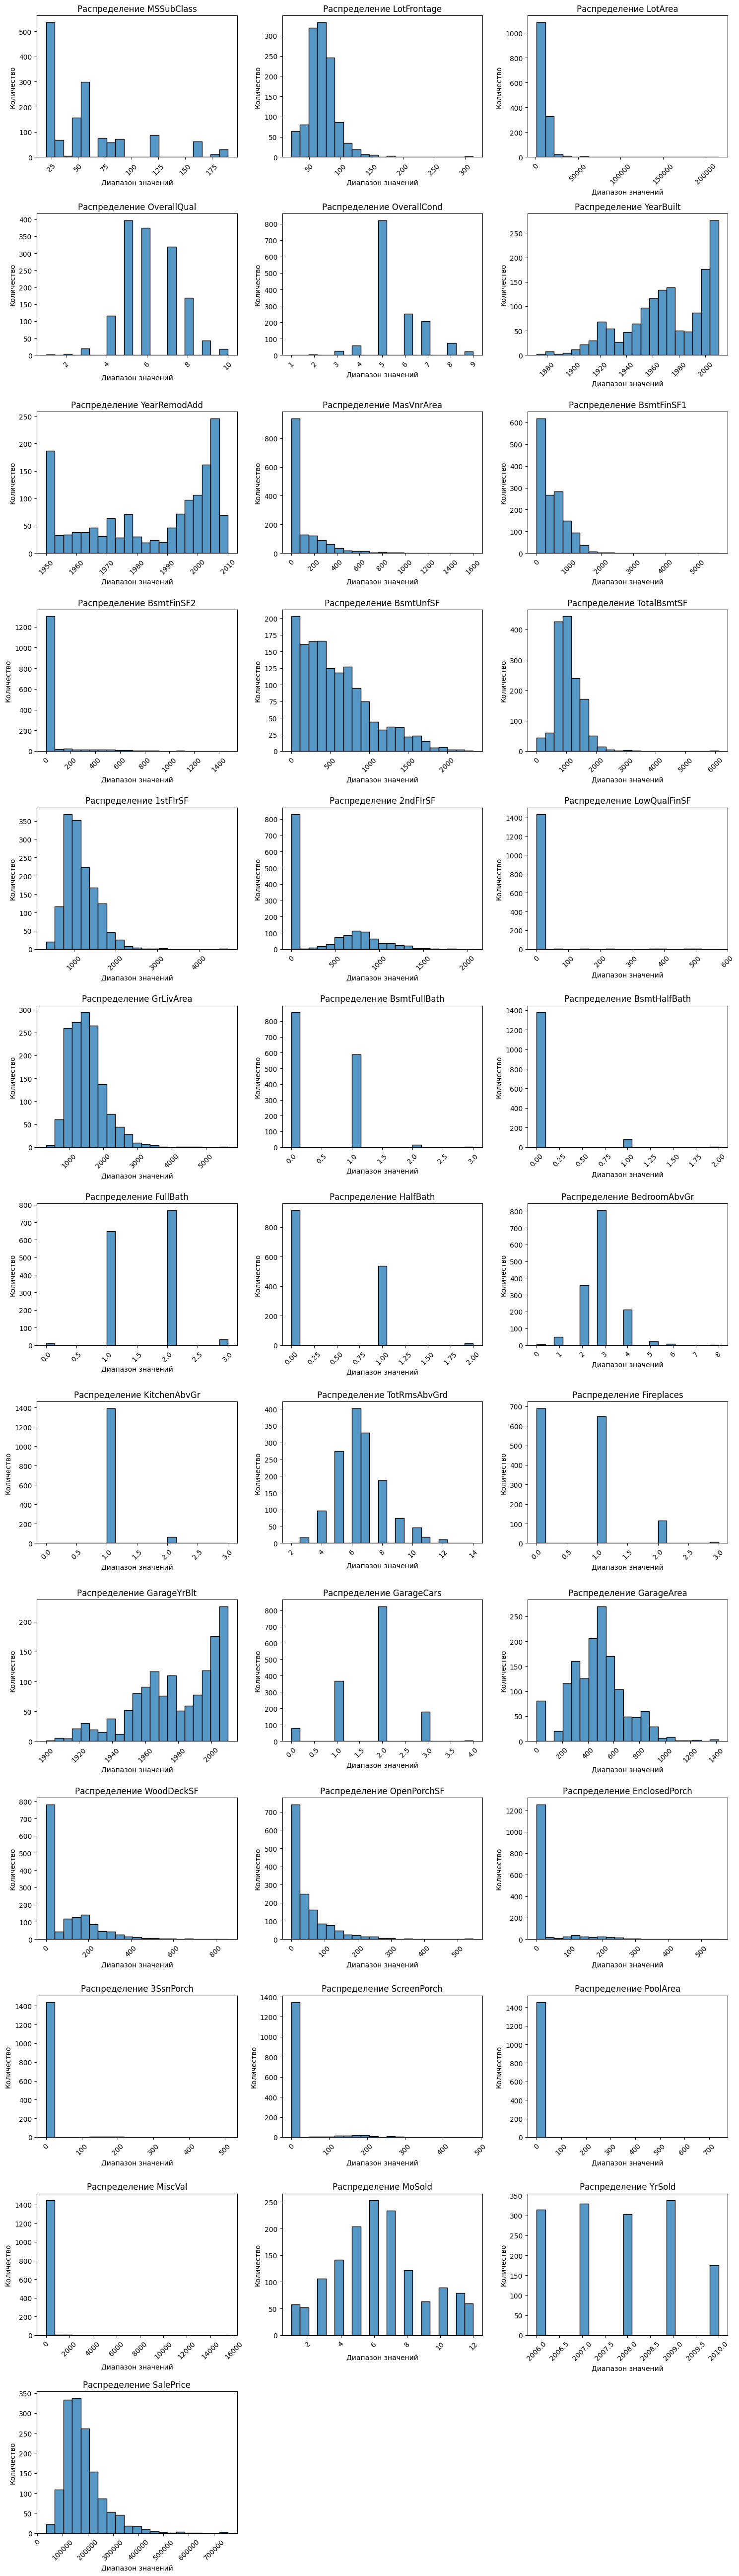

In [171]:

# Выбираем только числовые колонки
df_num = dataset_df.select_dtypes(include = ["float64", "int64"])

n_cols = 3
n_rows = (df_num.shape[1] - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    # Используем histplot вместо countplot
    # bins=21 создаст максимум 21 столбик
    # kde=False убирает линию оценки плотности
    sns.histplot(df_num[col], bins=21, ax=axes[i], kde=False)
    
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel('Диапазон значений')
    axes[i].set_ylabel('Количество')
    
    # Поворот меток, если они будут длинными
    axes[i].tick_params(axis='x', rotation=45)

# Удаляем пустые подобъекты axes, если количество колонок не кратно n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [172]:
len(df_num)

1460

/tmp/ipykernel_113013/2900332267.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cols = dataset_df.select_dtypes(include=['object']).columns


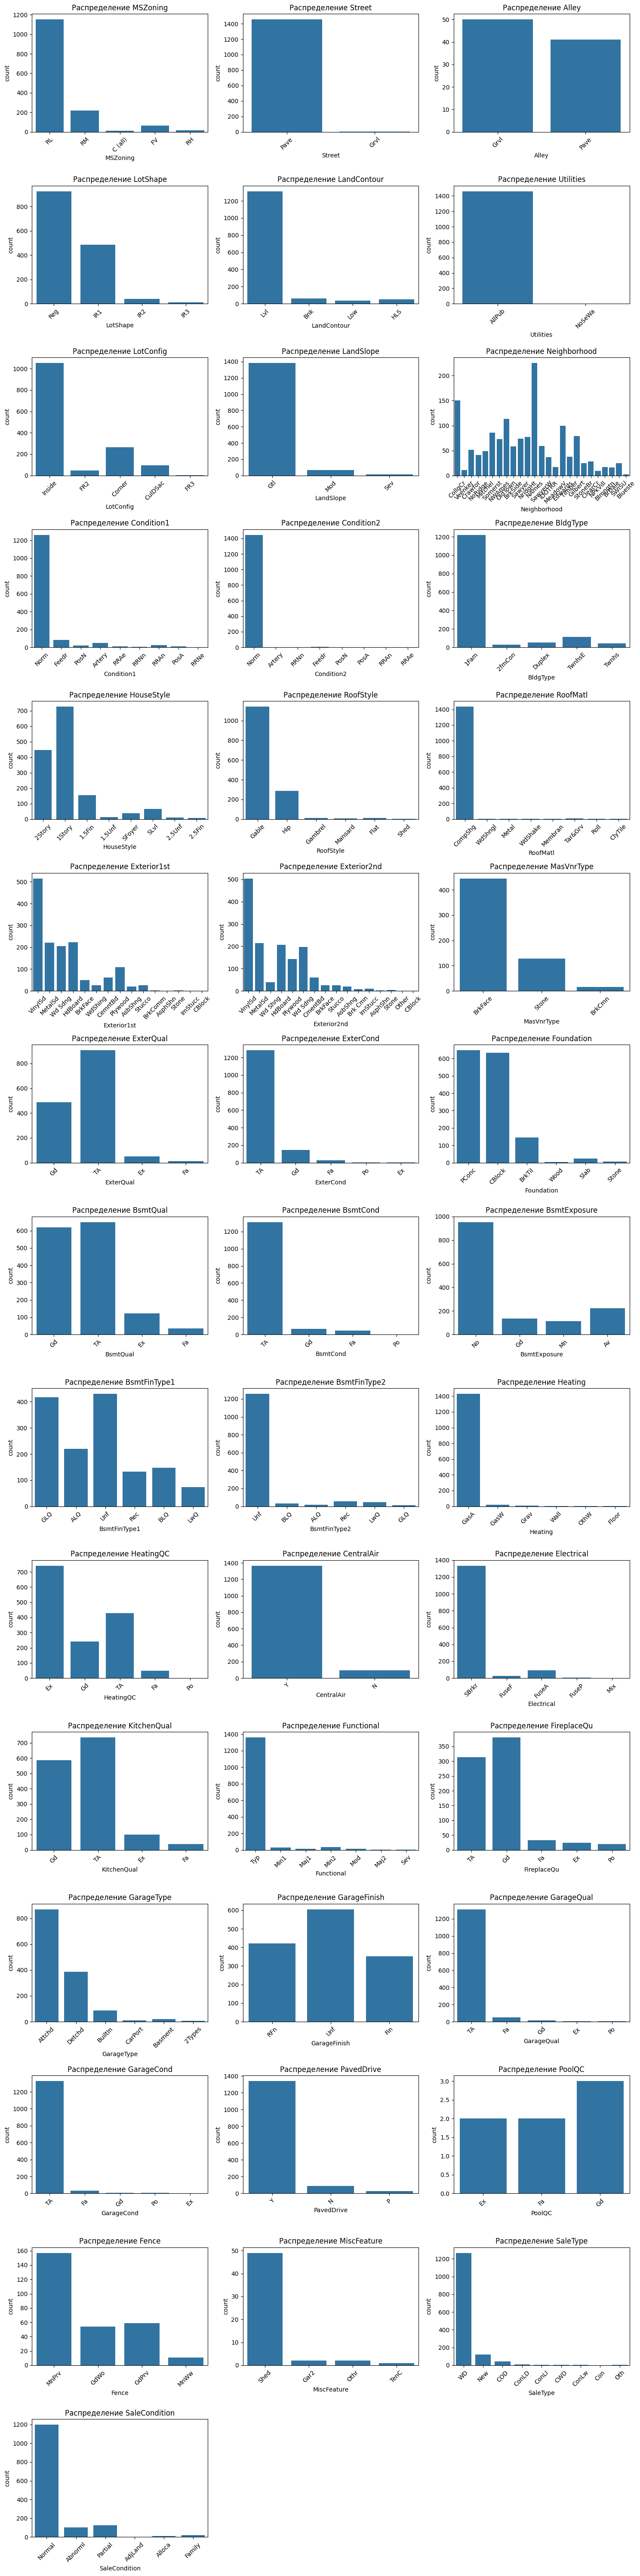

In [173]:
cols = dataset_df.select_dtypes(include=['object']).columns
n_cols = 3
n_rows = (len(cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=dataset_df[col], ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Убираем пустые графики, если колонок меньше чем ячеек
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

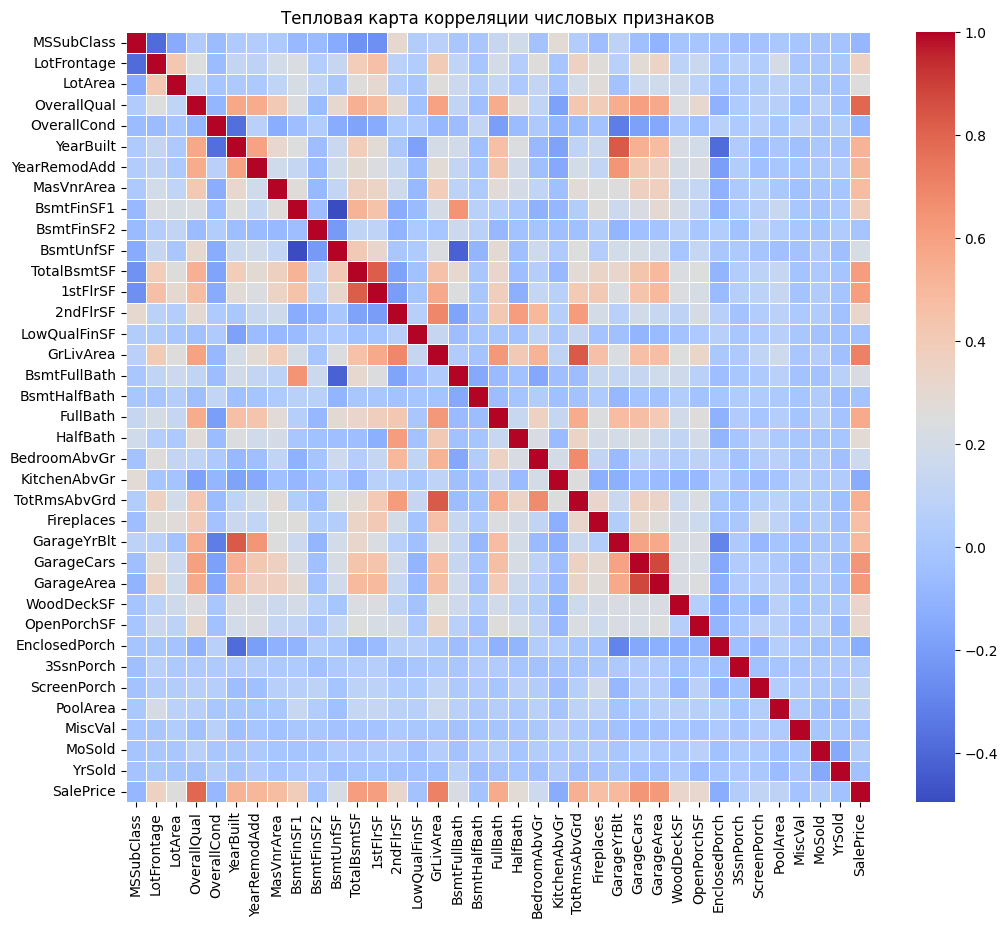

In [174]:
corr_matrix = df_num.corr()

# Настройка размера полотна
plt.figure(figsize=(12, 10))

# Строим heatmap
# cmap='coolwarm' наглядно показывает положительную (красный) и отрицательную (синий) корреляцию
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Тепловая карта корреляции числовых признаков')
plt.show()

In [175]:
# Вычисляем асимметрию для всех числовых признаков
numeric_feats = dataset_df.select_dtypes(include=["float64", "int64"]).columns
skewed_feats = dataset_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Превращаем в DataFrame для удобства
skewness = pd.DataFrame({'Skew' :skewed_feats})

# Фильтруем признаки с высокой асимметрией (порог 0.75)
high_skew = skewness[abs(skewness['Skew']) > 0.75]

print(f"Найдено {len(high_skew)} признаков с высокой асимметрией:")
print(high_skew)

Найдено 22 признаков с высокой асимметрией:
                    Skew
MiscVal        24.451640
PoolArea       14.813135
LotArea        12.195142
3SsnPorch      10.293752
LowQualFinSF    9.002080
KitchenAbvGr    4.483784
BsmtFinSF2      4.250888
ScreenPorch     4.117977
BsmtHalfBath    4.099186
EnclosedPorch   3.086696
MasVnrArea      2.666326
OpenPorchSF     2.361912
LotFrontage     2.160866
SalePrice       1.880941
BsmtFinSF1      1.683771
WoodDeckSF      1.539792
TotalBsmtSF     1.522688
MSSubClass      1.406210
1stFlrSF        1.375342
GrLivArea       1.365156
BsmtUnfSF       0.919323
2ndFlrSF        0.812194


In [176]:
df_num.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [177]:
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='str')

In [178]:
df_num["LotFrontage"]=dataset_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [179]:
df_num["GarageYrBlt"] = df_num["GarageYrBlt"].fillna(0)

In [180]:
df_num["MasVnrArea"] = df_num["MasVnrArea"].fillna(0)


In [181]:
print(df_num[["LotFrontage", "GarageYrBlt", "MasVnrArea"]].isnull().sum())

LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64


In [182]:
df_num["HasGarage"] = (df_num["GarageYrBlt"]>0).astype(int)

In [183]:
df_num["SalePrice"] = np.log1p(df_num["SalePrice"])

In [184]:
skewed_features = high_skew.index

for feat in skewed_features:
    df_num[feat] = np.log1p(df_num[feat])
print ("Логарифмирование завершено для:", list (skewed_features))


Логарифмирование завершено для: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'LotFrontage', 'SalePrice', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF', '2ndFlrSF']


In [185]:
len(skewed_features)

22

In [186]:
df_num = df_num.drop(df_num[(df_num["GrLivArea"]>4000)].index)

In [187]:
df_num.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasGarage
MSSubClass,1.000000,-0.406131,-0.378062,0.078346,-0.039820,-0.002896,0.039769,0.014375,-0.092035,-0.085838,...,0.028998,0.013820,-0.035954,-0.019569,0.025239,-0.028008,0.010286,-0.027520,-0.018877,-0.063328
LotFrontage,-0.406131,1.000000,0.683399,0.209408,-0.022015,0.090389,0.062012,0.137244,0.087867,0.051091,...,0.127389,-0.021198,0.059332,0.047759,0.113985,0.035495,0.017592,0.001920,0.361256,0.116987
LotArea,-0.378062,0.683399,1.000000,0.178220,-0.006308,0.021943,0.027672,0.069262,0.096966,0.084312,...,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.010518,-0.027164,0.398662,0.140277
OverallQual,0.078346,0.209408,0.178220,1.000000,-0.091932,0.572323,0.550684,0.409317,0.054199,-0.101469,...,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.070815,-0.027347,0.815005,0.261968
OverallCond,-0.039820,-0.022015,-0.006308,-0.091932,1.000000,-0.375983,0.073741,-0.154307,0.045200,0.077992,...,-0.100783,0.092471,0.038835,0.061548,-0.008085,0.079251,-0.003511,0.043950,-0.032208,0.009690
YearBuilt,-0.002896,0.090389,0.021943,0.572323,-0.375983,1.000000,0.592855,0.407628,0.151209,-0.068793,...,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.012398,-0.013618,0.587947,0.231072
YearRemodAdd,0.039769,0.062012,0.027672,0.550684,0.073741,0.592855,1.000000,0.220650,0.012105,-0.102425,...,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.021490,0.035743,0.566811,0.113826
MasVnrArea,0.014375,0.137244,0.069262,0.409317,-0.154307,0.407628,0.220650,1.000000,0.185368,-0.061345,...,0.207023,-0.185680,0.047540,0.038658,0.005662,-0.053511,0.018070,-0.002286,0.411643,0.160288
BsmtFinSF1,-0.092035,0.087867,0.096966,0.054199,0.045200,0.151209,0.012105,0.185368,1.000000,0.185051,...,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,-0.027153,0.033702,0.209386,0.104234
BsmtFinSF2,-0.085838,0.051091,0.084312,-0.101469,0.077992,-0.068793,-0.102425,-0.061345,0.185051,1.000000,...,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,-0.022430,0.029337,-0.028445,0.047597


/tmp/ipykernel_113013/2347776011.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=top_corr.values, y=top_corr.index, palette='viridis')


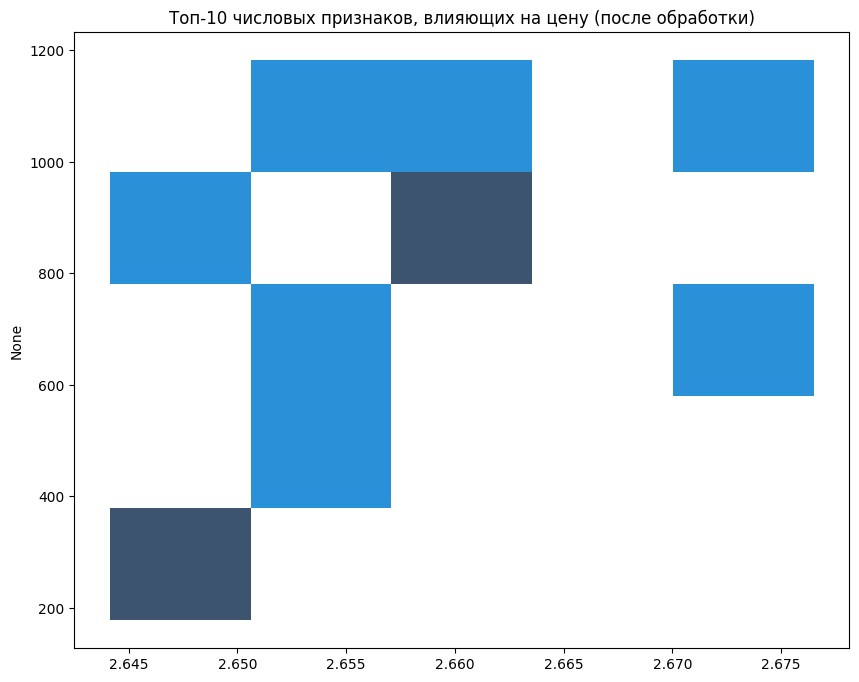

In [188]:
plt.figure(figsize=(10, 8))
top_corr = df_num['SalePrice'].sort_values(ascending=False).head(11)
sns.histplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Топ-10 числовых признаков, влияющих на цену (после обработки)')
plt.show()

/tmp/ipykernel_113013/3589949523.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_names, y=top_corr.values, palette='magma')


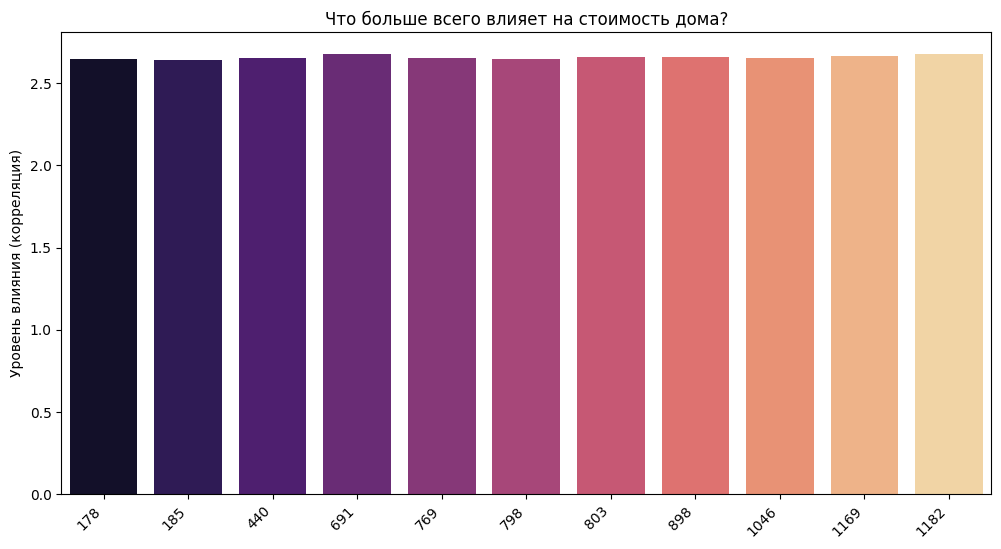

In [189]:
# 1. Готовим данные
top_corr = df_num['SalePrice'].sort_values(ascending=False).head(11)

# 2. Создаем список понятных названий
labels_map = {
    'SalePrice': 'Цена продажи',
    'OverallQual': 'Качество',
    'GrLivArea': 'Жилая площадь',
    'GarageCars': 'Гараж (мест)',
    'GarageArea': 'Пл. гаража',
    'TotalBsmtSF': 'Пл. подвала',
    '1stFlrSF': '1-й этаж',
    'FullBath': 'Ванные',
    'TotRmsAbvGrd': 'Комнат всего',
    'YearBuilt': 'Год постройки',
    'YearRemodAdd': 'Год реновации'
}
new_names = [labels_map.get(col, col) for col in top_corr.index]

# 3. Строим график
plt.figure(figsize=(12, 6))

# ПЕРЕДАЕМ: x - названия, y - числа
sns.barplot(x=new_names, y=top_corr.values, palette='magma')

plt.xticks(rotation=45, ha='right')
plt.title('Что больше всего влияет на стоимость дома?')
plt.ylabel('Уровень влияния (корреляция)')
plt.show()

/tmp/ipykernel_113013/1283617123.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_names, y=nice_labels, palette='magma')


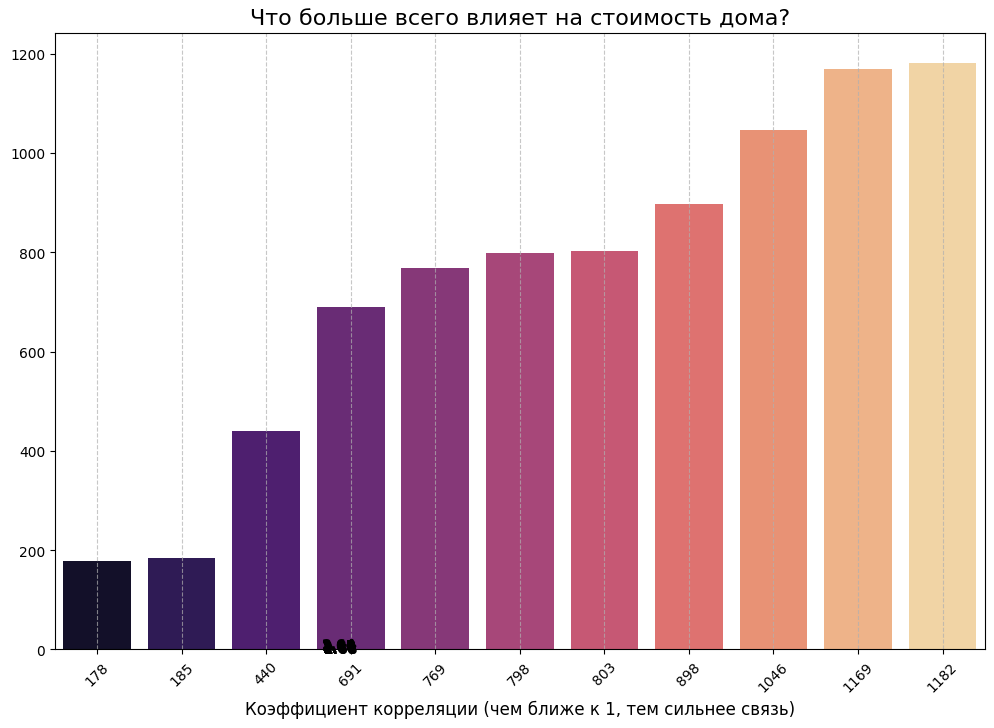

In [190]:
labels_map = {
    'SalePrice': 'Цена продажи',
    'OverallQual': 'Общее качество материалов',
    'GrLivArea': 'Жилая площадь (над землей)',
    'GarageCars': 'Вместимость гаража (авто)',
    'GarageArea': 'Площадь гаража',
    'TotalBsmtSF': 'Общая площадь подвала',
    '1stFlrSF': 'Площадь 1-го этажа',
    'FullBath': 'Полноценные ванные комнаты',
    'TotRmsAbvGrd': 'Всего комнат (без ванных)',
    'YearBuilt': 'Год постройки',
    'YearRemodAdd': 'Год реконструкции',
    'MasVnrArea': 'Площадь облицовки'
}

# 1. Получаем топ-10 корреляций
top_corr = df_num['SalePrice'].sort_values(ascending=False).head(11)

# 2. Создаем названия для графика (если названия нет в словаре, оставим как есть)
nice_labels = [labels_map.get(col, col) for col in top_corr.index]

labels_dict = {'OverallQual': 'Качество', 'GrLivArea': 'Пл. Жилая', 'GarageCars': 'Гараж (мест)'}
current_names = top_corr.index
new_names = [labels_dict.get(col, col) for col in current_names]

# 3. Строим красивый график
plt.figure(figsize=(12, 8))
sns.barplot(x=new_names, y=nice_labels, palette='magma')

# Добавляем подписи значений прямо на столбцы для наглядности
for i, v in enumerate(top_corr.values):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', fontweight='bold')

plt.title('Что больше всего влияет на стоимость дома?', fontsize=16)
plt.xlabel('Коэффициент корреляции (чем ближе к 1, тем сильнее связь)', fontsize=12,)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [191]:
# Используем твой основной датасет
# Убираем целевую переменную SalePrice и технический Id (если он еще есть)
X = dataset_df.drop(['SalePrice'], axis=1, errors='ignore')
y = np.log1p(dataset_df['SalePrice']) # Твоё логарифмирование цены

In [192]:
# Определяем списки колонок по типам данных
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

/tmp/ipykernel_113013/2806950012.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include=['object']).columns.tolist()


In [193]:
print(f"Твои числовые колонки: {len(num_features)}")
print(f"Категориальные колонки коллеги: {len(cat_features)}")

Твои числовые колонки: 36
Категориальные колонки коллеги: 43


In [194]:
# 1. ТВОЙ БЛОК (Числа): заполнение 0 + логарифмирование признаков
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('log', FunctionTransformer(np.log1p))
])

In [195]:
# 2. БЛОК КОЛЛЕГИ (Категории): самое частое значение + OneHot-кодирование
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [196]:
# 3. ОБЪЕДИНЕНИЕ: создаем общий препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [197]:
X_final = preprocessor.fit_transform(X)

In [198]:
print("Данные успешно объединены!")
print(f"Итоговое количество столбцов: {X_final.shape[1]}")
X_final.head()

Данные успешно объединены!
Итоговое количество столбцов: 287


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##обучение модели##

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [200]:
# 1. Разбиваем данные на тренировочные и валидационные (20% на проверку)
X_train, X_valid, y_train, y_valid = train_test_split(X_final, y, test_size=0.2, random_state=42)

# 2. Создаем и обучаем модель
# Используем случайный лес — он отлично справляется с таким количеством признаков
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Делаем предсказание
predictions = rf_model.predict(X_valid)

# 4. Считаем метрики (не забывай, что y у нас в логарифмах)
mae = mean_absolute_error(np.expm1(y_valid), np.expm1(predictions))
r2 = r2_score(y_valid, predictions)

print(f"Средняя ошибка (MAE): ${mae:,.2f}")
print(f"Точность модели (R^2): {r2:.4f}")

Средняя ошибка (MAE): $17,541.75
Точность модели (R^2): 0.8864


In [201]:
# 1. Разделяем данные на тренировочную и проверочную выборки
# X_final — твои объединенные данные, y — логарифмированная цена
X_train, X_valid, y_train, y_valid = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [202]:
# 2. Создаем и обучаем модель
# n_estimators=100 — количество деревьев в "лесу"
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [203]:
# 3. Делаем предсказания на проверочной выборке
y_pred = model.predict(X_valid)

In [204]:
# 4. Оценка качества
# Возвращаем цены из логарифмов в доллары (np.expm1), чтобы понять ошибку
real_mae = mean_absolute_error(np.expm1(y_valid), np.expm1(y_pred))
r2 = r2_score(y_valid, y_pred)

In [205]:
print(f"Средняя ошибка (MAE): ${real_mae:,.2f}")
print(f"Точность модели (R^2): {r2:.4f}")

Средняя ошибка (MAE): $17,541.75
Точность модели (R^2): 0.8864


In [206]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', VarianceThreshold(threshold=0.01)), # Удаляем колонки, где 99% значений одинаковы
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [207]:
# 2. Готовим данные для обучения (X) и таргет (y)
# Берем исходный dataset_df, убираем цену
X = dataset_df.drop(['SalePrice'], axis=1, errors='ignore')
y = np.log1p(dataset_df['SalePrice']) # Твой логарифм цены

# 3. Разделяем на тренировочную и проверочную выборки (чтобы не было ошибки NameError)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучаем созданный ранее full_pipeline
# Он включает: твою обработку чисел + её обработку текста + фильтрацию VarianceThreshold
full_pipeline.fit(X_train_raw, y_train)

# 5. Проверяем точность на валидации
score = full_pipeline.score(X_valid_raw, y_valid)
print(f"Обучение завершено! Точность R^2 на проверочной выборке: {score:.4f}")

# 6. ДЕЛАЕМ ПРЕДСКАЗАНИЕ ДЛЯ KAGGLE
# Берем данные из test.csv
test_preds_log = full_pipeline.predict(test_df)
test_preds_final = np.expm1(test_preds_log) # Возвращаем из логарифмов в доллары

# 7. СОХРАНЯЕМ В ФАЙЛ
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds_final
})
submission.to_csv('submission_first_day.csv', index=False)

print("Файл 'submission_first_day.csv' готов!")

Обучение завершено! Точность R^2 на проверочной выборке: 0.8820
Файл 'submission_first_day.csv' готов!


In [208]:
# Создаем обновленный Pipeline с XGBoost
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', VarianceThreshold(threshold=0.01)),
    ('model', XGBRegressor(
        n_estimators=1000,   # Больше деревьев
        learning_rate=0.05,  # Маленький шаг обучения для точности
        max_depth=5,         # Глубина деревьев
        random_state=42,
        n_jobs=-1
    ))
])

In [209]:
# Обучаем заново на тех же данных
full_pipeline.fit(X_train_raw, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('selector', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfo

In [210]:
# Проверяем новый результат
new_score = full_pipeline.score(X_valid_raw, y_valid)
print(f"Новая точность R^2 с XGBoost: {new_score:.4f}")

Новая точность R^2 с XGBoost: 0.8925


In [222]:
# 6. ДЕЛАЕМ ПРЕДСКАЗАНИЕ ДЛЯ KAGGLE
# Берем данные из test.csv
test_preds_log = full_pipeline.predict(test_df)
test_preds_final = np.expm1(test_preds_log) # Возвращаем из логарифмов в доллары

# 7. СОХРАНЯЕМ В ФАЙЛ
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds_final
})
submission.to_csv('./data/submission_first_day.csv', index=False)

print("Файл 'submission_first_day.csv' готов!")

Файл 'submission_first_day.csv' готов!


In [212]:
for df in [dataset_df, test_df]:
    # 1. Общая площадь (самый важный признак)
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # 2. Общее количество ванных комнат
    df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                            df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    
    # 3. Возраст дома на момент продажи
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    
    # 4. Был ли ремонт (если год постройки != году реновации)
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
    
    # 5. Общее качество (площадь умноженная на качество отделки)
    df['Total_Qual_SF'] = df['TotalSF'] * df['OverallQual']
    # 6. Время с последнего ремонта
    df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

In [213]:
# Обновляем списки признаков, так как появились новые колонки
X = dataset_df.drop(['SalePrice'], axis=1, errors='ignore')
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

/tmp/ipykernel_113013/881739404.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include=['object']).columns.tolist()


In [214]:
print(f"Признаки обновлены! Теперь их в базе: {len(num_features) + len(cat_features)}")

Признаки обновлены! Теперь их в базе: 85


In [215]:
num_features = dataset_df.drop(['SalePrice'], axis=1, errors='ignore').select_dtypes(include=['int64', 'float64']).columns.tolist()

In [216]:
# Создаем обновленный Pipeline с XGBoost c исправлением моедли
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', VarianceThreshold(threshold=0.01)),
    ('model', XGBRegressor(
    n_estimators=2000,        # Увеличиваем количество деревьев
    learning_rate=0.01,       # Делаем шаг еще меньше (модель будет учиться медленнее, но точнее)
    max_depth=4,              # Уменьшаем глубину, чтобы не было переобучения
    subsample=0.8,            # Модель будет видеть только 80% данных каждый раз (добавляет случайности)
    colsample_bytree=0.8,     # Используем 80% признаков для каждого дерева
    n_jobs=-1,
    random_state=42
))
])

In [217]:
# Настраиваем XGBoost более тонко
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', VarianceThreshold(threshold=0.01)),
    ('model', XGBRegressor(
        n_estimators=2000,    # Увеличиваем количество итераций
        learning_rate=0.02,   # Уменьшаем шаг обучения для стабильности
        max_depth=4,          # Ограничиваем глубину, чтобы не переобучаться
        subsample=0.7,        # Обучаемся на случайных подмножествах данных
        colsample_bytree=0.7, # Используем случайные подмножества признаков
        n_jobs=-1,
        random_state=42
    ))
])

In [218]:
# Обучаем заново на тех же данных
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
full_pipeline.fit(X_train_raw, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('selector', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfo

In [219]:
# Проверяем новый результат
new_score = full_pipeline.score(X_valid_raw, y_valid)
print(f"Новый R^2 после улучшения признаков: {full_pipeline.score(X_valid_raw, y_valid):.4f}")

Новый R^2 после улучшения признаков: 0.9031


In [223]:
# 6. ДЕЛАЕМ ПРЕДСКАЗАНИЕ ДЛЯ KAGGLE(3)
# Берем данные из test.csv
test_preds_log = full_pipeline.predict(test_df)
test_preds_final = np.expm1(test_preds_log) # Возвращаем из логарифмов в доллары

# 7. СОХРАНЯЕМ В ФАЙЛ
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_preds_final
})
submission.to_csv('./data/submission_first_day.csv', index=False)

print("Файл 'submission_first_day.csv' готов!")

Файл 'submission_first_day.csv' готов!


In [224]:
# Сохраняем весь пайплайн целиком (вместе с препроцессором!)
joblib.dump(full_pipeline, 'house_model.pkl')
print("Модель сохранена в файл house_model.pkl")

Модель сохранена в файл house_model.pkl
